In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from random import randint
import json
import collections

plt.style.use(["Solarize_Light2"])
plt.rcParams["axes.edgecolor"] = "#66818c"
plt.rcParams["axes.facecolor"] = "#263238"
plt.rcParams["figure.facecolor"] = "#263238"
plt.rcParams["grid.color"] = "#3f575b"
plt.rcParams["xtick.color"] = "#bfd5dd"
plt.rcParams["ytick.color"] = "#bfd5dd"
plt.rcParams["text.color"] = "#bfd5dd"
plt.rcParams["axes.labelcolor"] = "#bfd5dd"

engine = create_engine("postgresql+psycopg2://{}:{}@{}:{}/{}".format("postgres",
                                                                     "123",
                                                                     "172.17.0.2",
                                                                     "5432",
                                                                     "estimator"))

In [73]:
query = """ SELECT price,
                   area,
                   material,
                   district,
                   lng,
                   lat
            FROM flat
            INNER JOIN building ON building_id = building.id
            WHERE NOT district IS NULL
        """
df = pd.read_sql(query, engine)

In [74]:
df.material = df.material.fillna(-1)
df.loc[:, "ppm"] = df.price / df.area
df.drop(["price", "area"], axis=True, inplace=True)

In [75]:
df = df.set_index(["lng", "lat"]).sort_index()

In [76]:
idx = df.index.unique()

In [77]:
for lng, lat in idx:
    df.loc[(lng, lat), "ppmm"] = df.loc[(lng, lat), "ppm"].mean()

In [82]:
data = dict()
for lng, lat in idx:
    if not (lng, lat) in data.keys():
        data[(lng, lat)] = dict(lng=lng, lat=lat,
                                ppmm=df.loc[(lng, lat), "ppmm"][0],
                                material=df.loc[(lng, lat), "material"][0],
                                district=df.loc[(lng, lat), "district"][0])

In [83]:
df1 = pd.DataFrame(data.values())
df1

lng        lat           ppmm  material  district
0     36.864371  55.430436  117841.011743       2.0        10
1     36.865036  55.430998  116036.258942       2.0        10
2     36.865143  55.429205  102505.694761       3.0        10
3     36.865647  55.428562   92172.351114       3.0        10
4     36.865826  55.431335  110121.502007       2.0        10
...         ...        ...            ...       ...       ...
9313  37.948844  55.702982  108716.752323       3.0         4
9314  37.948898  55.701516  118499.500740       3.0         4
9315  37.949626  55.703540  116943.612976       3.0         4
9316  37.949931  55.702191  120442.833494       3.0         4
9317  37.950668  55.703155  118428.293338       3.0         4

[9318 rows x 5 columns]

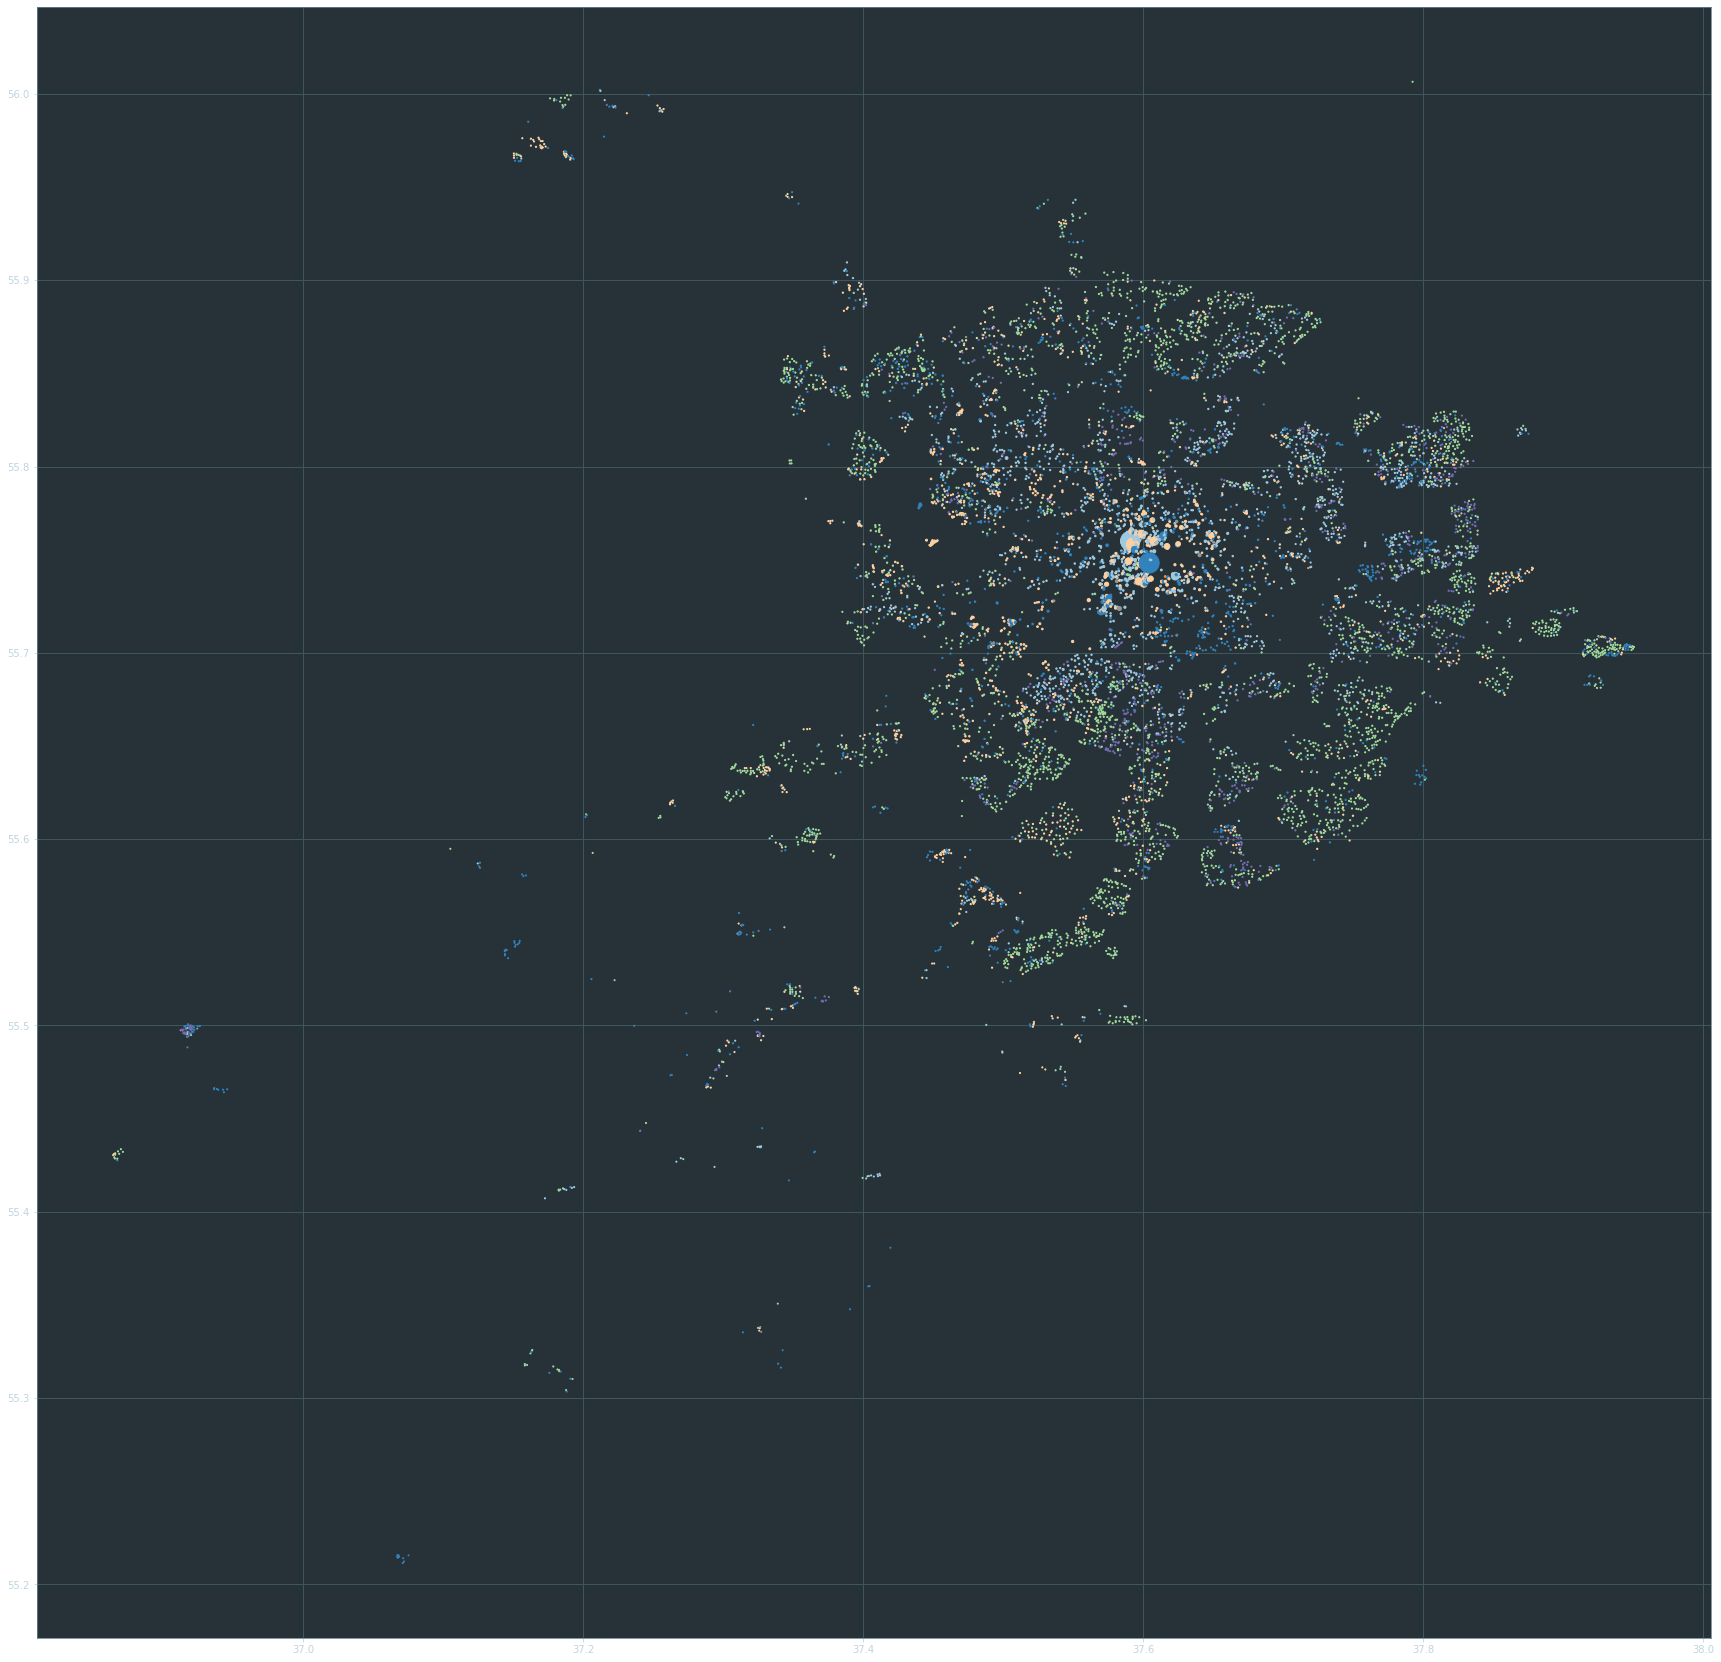

In [79]:
plt.figure(figsize=(30, 30))
plt.scatter(df1.lng, df1.lat, s=10**(df1.ppmm/1000000), c=df1.material, cmap="tab20c")

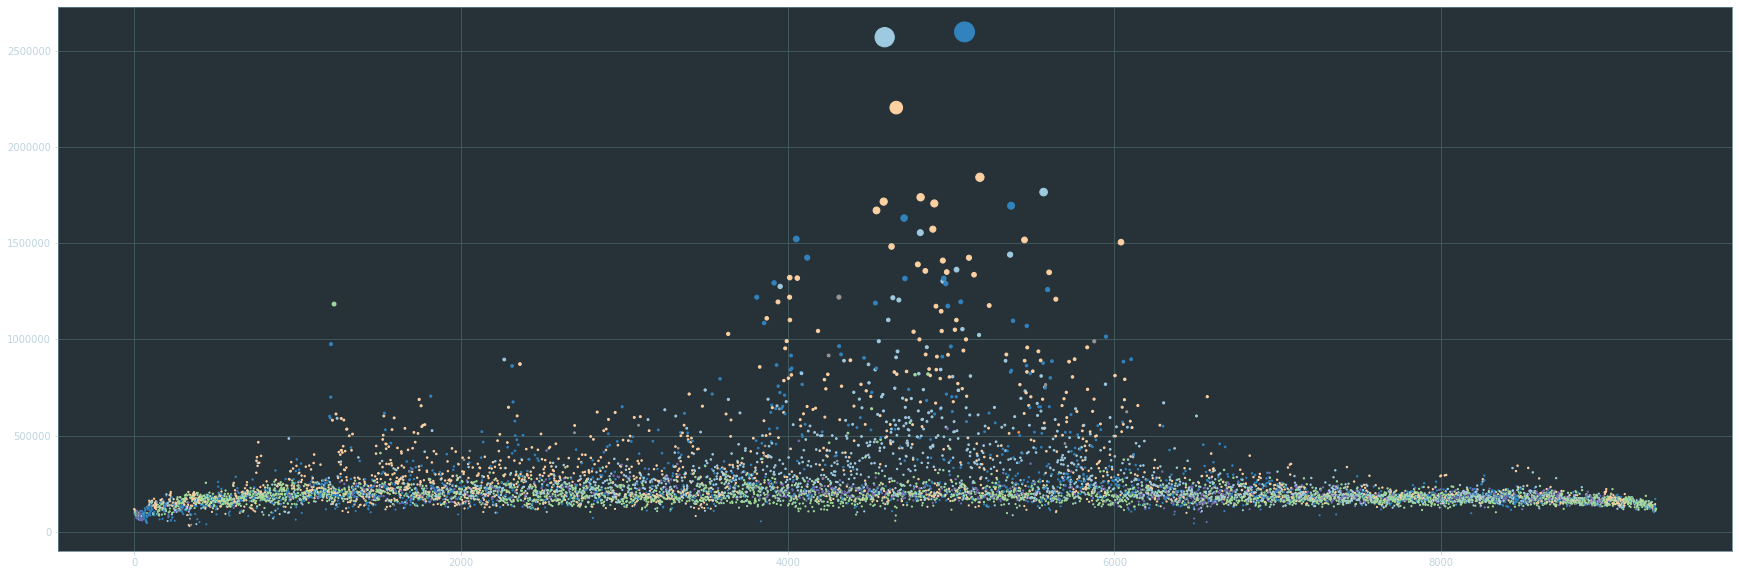

In [80]:
plt.figure(figsize=(30, 10))
plt.scatter(df1.index, df1.ppmm, c=df1.material, s=10**(df1.ppmm/1000000), cmap="tab20c");

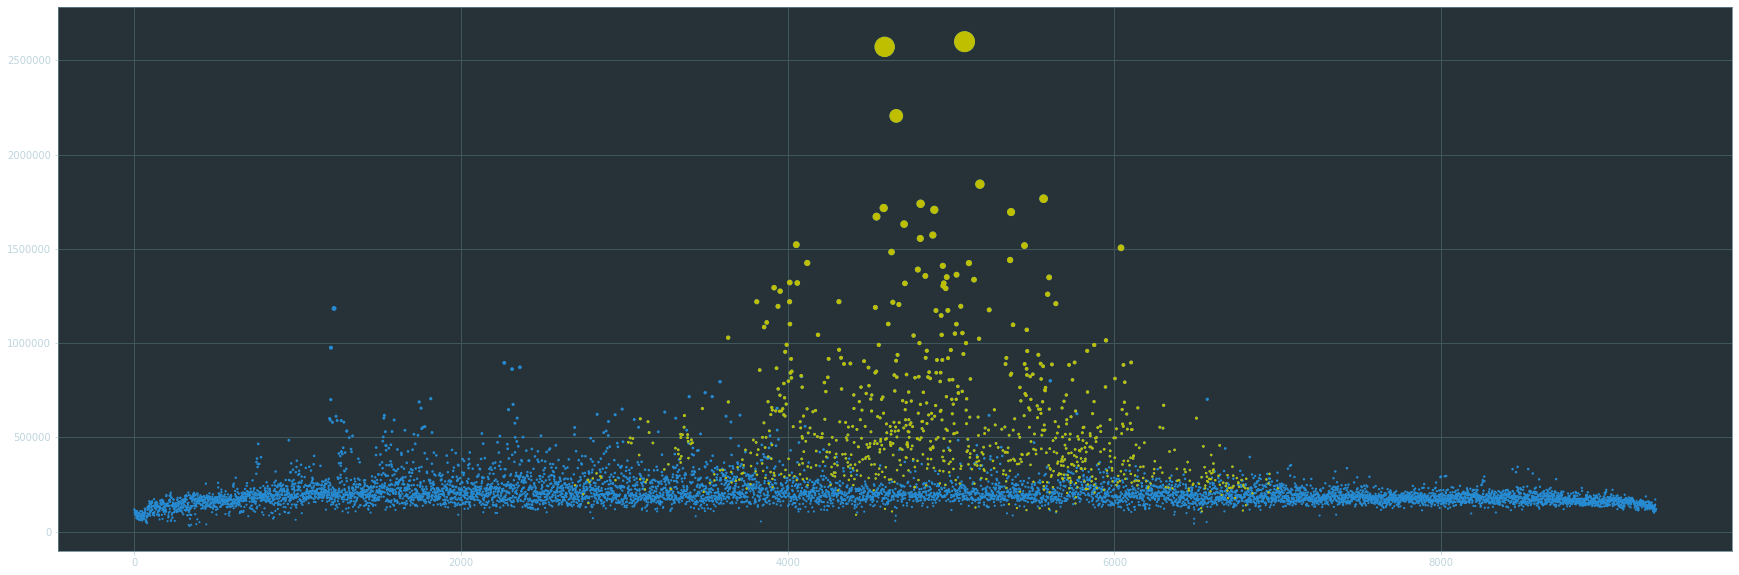

In [97]:
plt.figure(figsize=(30, 10))
plt.scatter(df1.index, df1.ppmm, s=10**(df1.ppmm/1000000))
plt.scatter(df1[df1.district==0].index, df1[df1.district==0].ppmm, c="y", s=10**(df1[df1.district==0].ppmm/1000000));

643577.0167377716

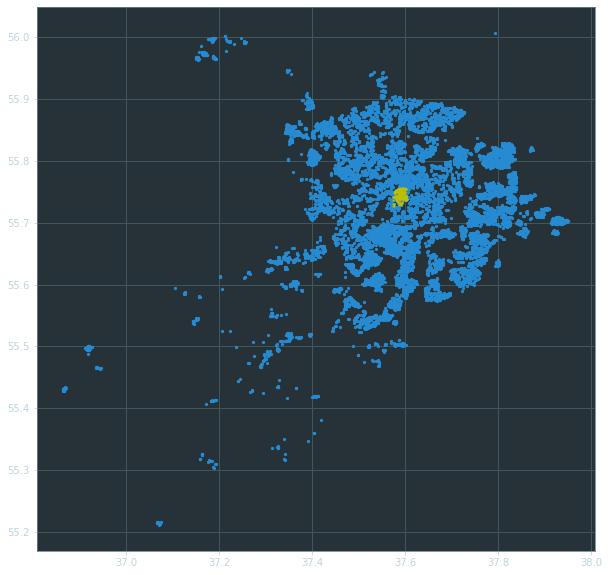

In [149]:
lng = df1.loc[df1.district==0, "lng"].iloc[250]
lat = df1.loc[df1.district==0, "lat"].iloc[250]
plt.figure(figsize=(10, 10))
plt.scatter(df1.lng, df1.lat, s=5)
plt.scatter(lng, lat, s=10, c="y")
ro = .015
exp = (df1.lng < lng + ro) & (df1.lng > lng - ro) & (df1.lat < lat + ro) & (df1.lat > lat - ro)
df2 = df1[exp]
plt.scatter(df2.lng, df2.lat, s=1, c="y");
df2.ppmm.mean()
# df1.lng.mean(), df1.lng.std()